# Spatial Weights
Spatial weights are central components of many areas of spatial analysis. The spatial weights matrix expresses the potential for interaction between observations at each pair i,j of locations. There are three types of weight matrices
* Contiguity Based Weights
* Distance Based Weights
* Kernel weights 

## Continuity Based Weights 
Let's create the following raster. 
|1|2|3|
--------
|4|5|6|
_______
|7|8|9|
_______

In [2]:
# if using libpysal 
import libpysal as ps
# if using pysal
# import pysal.
w = ps.weights.lat2W(3, 3)
Wmatrix, ids = w.full()
print(Wmatrix)
print(ids)
w.transform = 'r'
Wmatrix, ids = w.full()
print(Wmatrix)
print(w.n)
print(w.pct_nonzero)
print(w.weights[4])
print(w.neighbors[4])
print(w.histogram)

[[0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[[0.         0.5        0.         0.5        0.         0.
  0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.         0.33333333 0.
  0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.5
  0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.33333333 0.
  0.33333333 0.         0.        ]
 [0.         0.25       0.         0.25       0.         0.25
  0.         0.25       0.        ]
 [0.         0.         0.33333333 0.         0.33333333 0.
  0.         0.         0.33333333]
 [0.         0.         0.         0.5        0.         0.
  0.         0.5        0.        ]
 [0.         0.         0.

In [3]:
w = ps.weights.lat2W(3, 3, rook=False)
Wmatrix, ids = w.full()
print(Wmatrix)
print(ids)
w.transform = 'r'
Wmatrix, ids = w.full()
print(Wmatrix)
print(w.n)
print(w.pct_nonzero)
print('Neigh Weight Mid:', w.weights[4])
print('Neigh Mid:', w.neighbors[4])
print(w.histogram)

[[0. 1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[[0.         0.33333333 0.         0.33333333 0.33333333 0.
  0.         0.         0.        ]
 [0.2        0.         0.2        0.2        0.2        0.2
  0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.33333333 0.33333333
  0.         0.         0.        ]
 [0.2        0.2        0.         0.         0.2        0.
  0.2        0.2        0.        ]
 [0.125      0.125      0.125      0.125      0.         0.125
  0.125      0.125      0.125     ]
 [0.         0.2        0.2        0.         0.2        0.
  0.         0.2        0.2       ]
 [0.         0.         0.         0.33333333 0.33333333 0.
  0.         0.33333333 0.        ]
 [0.         0.  

0    POINT (3.00000 5.00000)
1    POINT (3.00000 3.50000)
2    POINT (3.00000 2.50000)
dtype: geometry
[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]
[0, 1, 2]
[[0.  1.  0. ]
 [0.5 0.  0.5]
 [0.  1.  0. ]]
3
44.44444444444444
Neigh Weight Mid: [0.5, 0.5]
Neigh Mid: [0, 2]
Neigh Weight Mid: [1.0]
Neigh Mid: [1]
[(1, 2), (2, 1)]


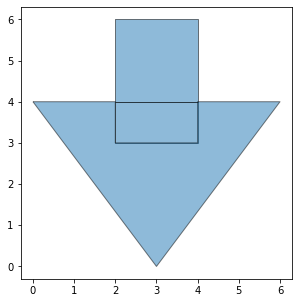

In [4]:
import geopandas as gpd
df = gpd.read_file(ps.examples.get_path("rook31.shp"))
df.plot(figsize=(5, 5), alpha=0.5, edgecolor='k')
cents = df.centroid
print(cents)
w = ps.weights.Rook.from_shapefile(ps.examples.get_path("rook31.shp"))

Wmatrix, ids = w.full()
print(Wmatrix)
print(ids)
w.transform = 'r'
Wmatrix, ids = w.full()
print(Wmatrix)
print(w.n)
print(w.pct_nonzero)
print('Neigh Weight Mid:', w.weights[1])
print('Neigh Mid:', w.neighbors[1])
print('Neigh Weight Mid:', w.weights[2])
print('Neigh Mid:', w.neighbors[2])
print(w.histogram)


## KNN Weights 

,ID,X,Y,geometry
0,1,94,93,POINT (94.000 93.000)
1,2,80,95,POINT (80.000 95.000)
2,3,79,90,POINT (79.000 90.000)
3,4,78,92,POINT (78.000 92.000)
4,5,76,92,POINT (76.000 92.000)


168


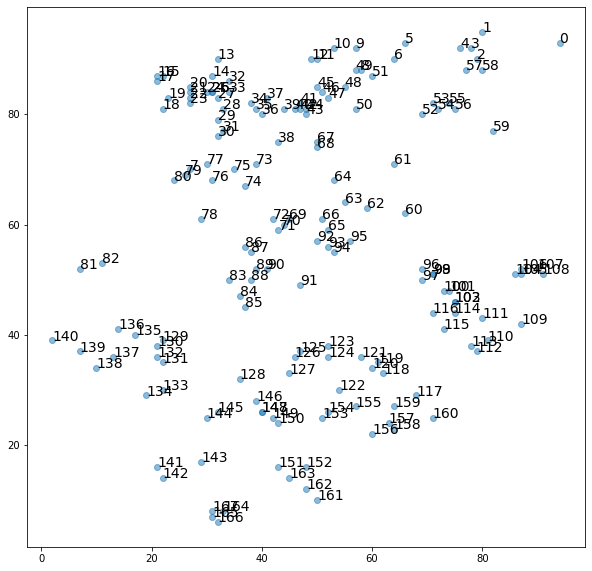

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt 
df = gpd.read_file(ps.examples.get_path("juvenile.shp"))
display(df.head())
cents = df.centroid

print(df.shape[0])

ax = df.plot(figsize=(10, 10), alpha=0.5)
for x in range(0, df.shape[0]):
    plt.text(cents[x].x,cents[x].y,str(x), fontsize=14)

In [17]:
import numpy as np
knn2 = ps.weights.KNN.from_dataframe(df, k=2)
print(knn2[0])
print(knn2[1])
print(df.centroid)

cents = df.centroid
pts = np.array([(pt.x, pt.y) for pt in cents])
# Compute KNN weights
knn2_from_pts = ps.weights.KNN.from_array(pts, k=2)
print(knn2_from_pts[0])
print(knn2_from_pts[1])

{1: 1.0, 58: 1.0}
{3: 1.0, 4: 1.0}
0      POINT (94.000 93.000)
1      POINT (80.000 95.000)
2      POINT (79.000 90.000)
3      POINT (78.000 92.000)
4      POINT (76.000 92.000)
               ...          
163    POINT (45.000 14.000)
164     POINT (33.000 8.000)
165     POINT (31.000 7.000)
166     POINT (32.000 6.000)
167     POINT (31.000 8.000)
Length: 168, dtype: geometry
{1: 1.0, 58: 1.0}
{3: 1.0, 4: 1.0}


/opt/conda/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 21 disconnected components.
  warnings.warn(message)
/opt/conda/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 21 disconnected components.
  warnings.warn(message)


## Distance based weights 
Another approach to build distance-based spatial weights matrices is to draw a circle of certain radious and consider neighbor every observation that falls within the circle. The technique has two main variations: binary and continuous. In the former one, every neighbor is given a weight of one, while in the second one, the weights can be further tweaked by the distance to the observation of interest.

In [20]:
w_dist20 = ps.weights.DistanceBand.from_dataframe(df, 20, binary=False)

Wmatrix, ids = w_dist20.full()
print(Wmatrix)

[[0.         0.07071068 0.06537205 ... 0.         0.         0.        ]
 [0.07071068 0.         0.19611614 ... 0.         0.         0.        ]
 [0.06537205 0.19611614 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.70710678 1.        ]
 [0.         0.         0.         ... 0.70710678 0.         0.4472136 ]
 [0.         0.         0.         ... 1.         0.4472136  0.        ]]


/opt/conda/lib/python3.9/site-packages/scipy/sparse/_data.py:117: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
